# CIGRE European Low Voltage Residential Network

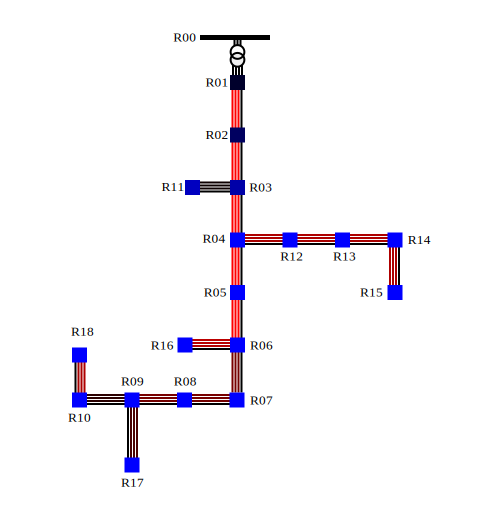

In [1]:
from IPython.core.display import HTML,SVG
SVG('./cigre_eu_lv_res_tooltips.svg')

## Model building

In [2]:
from pydae.urisi import urisi_builder
grid = urisi_builder.urisi('cigre_eu_lv_res.hjson')
grid.uz_jacs = False
grid.build('cigre_eu_lv_res')

## Model use

In [6]:
import numpy as np
from pydae.urisi.utils import report_v,get_v,get_i,get_power
from pydae.urisi.lines import change_line
import matplotlib.pyplot as plt
from pydae.svg_tools import svg,grid2svg

In [7]:
import cigre_eu_lv_res 

In [8]:
model = cigre_eu_lv_res.model()

p_load,q_load = 50e3,10e3
params = {'p_load_R18_a':p_load/3,'q_load_R18_a':q_load/3,
          'p_load_R18_b':p_load/3,'q_load_R18_b':q_load/3,
          'p_load_R18_c':p_load/3,'q_load_R18_c':q_load/3}

model.ini(params,'xy_0.json')
report_v(model,'cigre_eu_lv_res.hjson');


V_R00_an: 11546.5|   -0.0º V,    V_R00_ag: 11546.5|   -0.0º V,    V_1 = 11546.5 V, unb = 0.00%
V_R00_bn: 11546.5| -120.0º V,    V_R00_bg: 11546.5| -120.0º V,    V_2 =     0.0 V
V_R00_cn: 11546.5|  120.0º V,    V_R00_cg: 11546.5|  120.0º V,    v_0 =     0.0 V
  V_R00_ng:      0.0|      0.0º V
V_R01_an:   226.6|  -31.7º V,    V_R01_ag:   226.2|  -31.7º V,    V_1 =   226.6 V, unb = 0.02%
V_R01_bn:   226.6| -151.7º V,    V_R01_bg:   226.4| -151.9º V,    V_2 =     0.0 V
V_R01_cn:   226.6|   88.3º V,    V_R01_cg:   227.1|   88.3º V,    v_0 =     0.5 V
  V_R01_ng:      0.5|    104.1º V
V_R02_an:   224.1|  -31.8º V,    V_R02_ag:   223.9|  -31.7º V,    V_1 =   224.6 V, unb = 0.42%
V_R02_bn:   224.5| -151.9º V,    V_R02_bg:   224.4| -151.9º V,    V_2 =     0.2 V
V_R02_cn:   225.1|   88.2º V,    V_R02_cg:   225.3|   88.2º V,    v_0 =     0.6 V
  V_R02_ng:      0.2|    104.7º V
V_R03_an:   221.7|  -31.8º V,    V_R03_ag:   221.7|  -31.8º V,    V_1 =   222.5 V, unb = 0.83%
V_R03_bn:   222.4| -152.0º

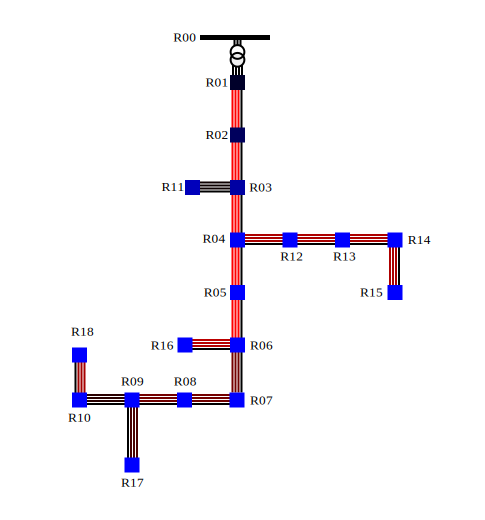

In [9]:
s = svg('./cigre_eu_lv_res.svg')
s.set_grid(model,'cigre_eu_lv_res.hjson')
s.set_tooltips(f'./cigre_eu_lv_res_results.svg')    

SVG('./cigre_eu_lv_res_results.svg')

In [10]:
P = []
V = []
for p_R18 in np.arange(50e3,-50e3, -10e3):
    model = cigre_eu_lv_res.model()

    q_R18 = p_R18*0.2
    p_load,q_load = p_R18,q_R18
    params = {'p_load_R18_a':p_load/3,'q_load_R18_a':q_load/3,
              'p_load_R18_b':p_load/3,'q_load_R18_b':q_load/3,
              'p_load_R18_c':p_load/3,'q_load_R18_c':q_load/3}

    model.ini(params,'xy_0.json')
    V_R18 = get_v(model,'R18')
    print(f"Power = {-p_R18/1e3:5.1f} kW, Voltage = {V_R18:0.1f} V")
    P += [p_R18]
    V += [V_R18]

Power = -50.0 kW, Voltage = 210.3 V
Power = -40.0 kW, Voltage = 212.0 V
Power = -30.0 kW, Voltage = 213.7 V
Power = -20.0 kW, Voltage = 215.3 V
Power = -10.0 kW, Voltage = 217.0 V
Power =  -0.0 kW, Voltage = 218.5 V
Power =  10.0 kW, Voltage = 220.1 V
Power =  20.0 kW, Voltage = 221.6 V
Power =  30.0 kW, Voltage = 223.2 V
Power =  40.0 kW, Voltage = 224.7 V


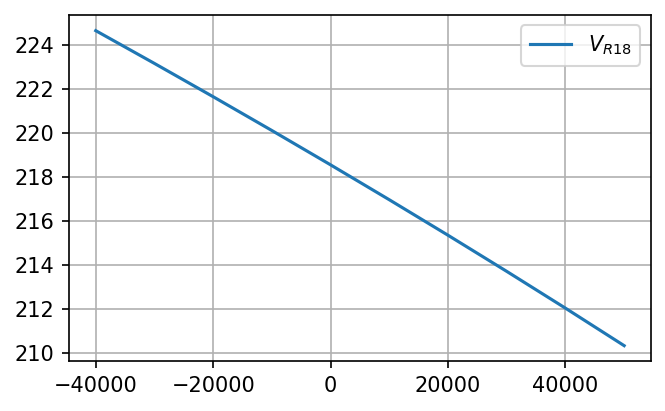

In [11]:
plt.close('all')
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(5, 3), frameon=False, dpi=150)

axes.plot(P, V, label=f'$V_{{R18}}$')
axes.legend()
axes.grid(True)